In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_kddcup99
import numpy as np

kdd99_data = fetch_kddcup99(subset='http')
X = kdd99_data['data']
y = kdd99_data['target']

y[y == b'normal.'] = 1
y[y != 1] = -1
y = np.int64(y)

In [2]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
print(set(y_train))
print(set(y_test))

{1, -1}
{1, -1}


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

recall_scores = []
precision_scores = []
f1_scores = []
weighted_f1_scores = []
false_alarms = []

def calculations(n):
    
    clf = RandomForestClassifier(max_depth = n, random_state = 42)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_pred = np.array(y_pred)
    
    
    p = precision_score(y_test, y_pred, pos_label = -1)
    r = recall_score(y_test, y_pred, pos_label = -1)
    f = f1_score(y_test, y_pred, pos_label = -1)
    wf = f1_score(y_test, y_pred, average = 'weighted')
    
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    false_alarm = fp/(fp+tn) 
    
    recall_scores.append(r)
    precision_scores.append(p)
    f1_scores.append(f)
    weighted_f1_scores.append(wf)
    false_alarms.append(false_alarm)

In [5]:
ilist = []
i = 5
while i<3000:
    calculations(i)
    ilist.append(i)
    i=i*2

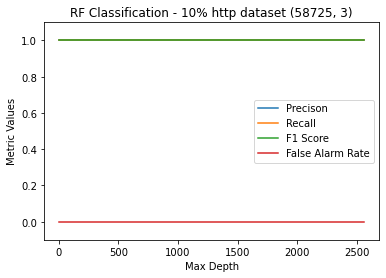

In [6]:
# Grouped - Precision, Recall, Binary F1, False Alarm
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, f1_scores, label = 'F1 Score')
plt.plot(ilist, false_alarms, label = 'False Alarm Rate')
    
plt.xlabel('Max Depth')
plt.ylabel('Metric Values')
plt.title('RF Classification - 10% http dataset (58725, 3)')
    
leg = plt.legend();

plt.ylim((-.1, 1.1))

plt.show()

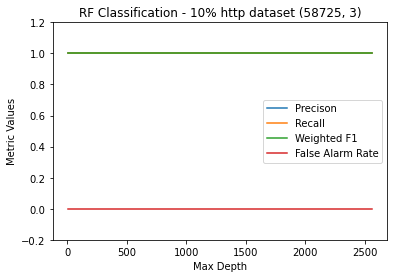

In [7]:
# Grouped - Precision, Recall, Weighted F1
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, f1_scores,label='Weighted F1')
plt.plot(ilist, false_alarms, label = 'False Alarm Rate')
    
plt.xlabel('Max Depth')
plt.ylabel('Metric Values')
plt.title('RF Classification - 10% http dataset (58725, 3)')
    
leg = plt.legend();

plt.ylim((-.2, 1.2))

plt.show()